In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Load the Iris dataset
iris = load_iris()
#print(iris.DESCR)#print Data Set Characteristics

# Extract the first two features (sepal length and sepal width)
X = iris.data[:, :2]
y = iris.target

# Create a DataFrame with the iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Print the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Structure of the Iris Dataset
Features (Columns 1-4):

The dataset contains four numerical features (measurements) for each sample, which describe the physical dimensions of the Iris flowers:

Sepal length (cm): The length of the sepal in centimeters.

Sepal width (cm): The width of the sepal in centimeters.

Petal length (cm): The length of the petal in centimeters.

Petal width (cm): The width of the petal in centimeters.

Target (Species):

The target variable represents the species of the Iris flower and is encoded as an integer:

0: Setosa

1: Versicolor

2: Virginica

These species are distinct types of Iris flowers, and the goal of the classification task is to correctly identify the species based on the given features.
Number of Samples:

The dataset contains 150 samples (rows), with 50 samples for each of the three species.

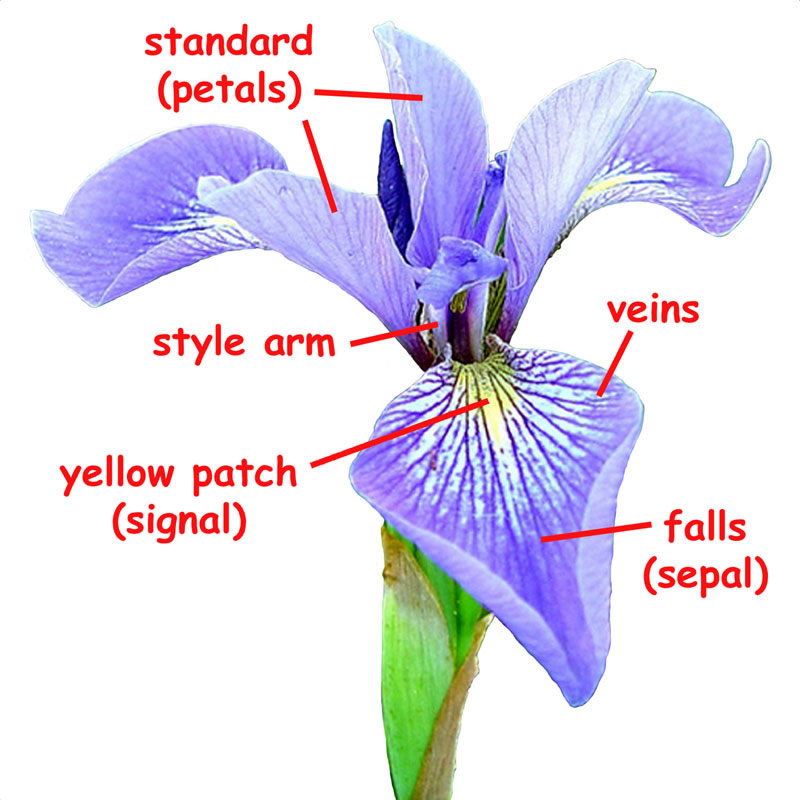

(105, 2)
Accuracy: 0.7555555555555555
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45

Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]


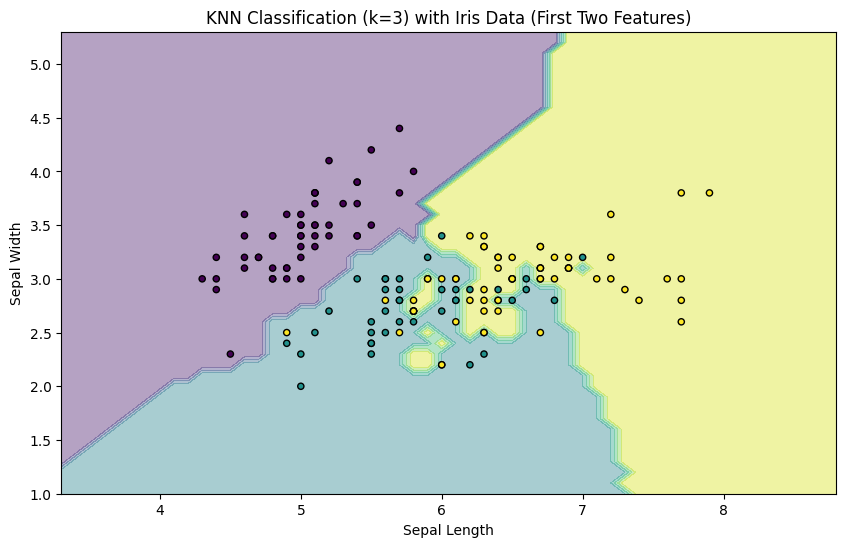

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
#the model uses the Euclidean distance by default
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Create meshgrid for background color
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict classifications for our grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('KNN Classification (k=3) with Iris Data (First Two Features)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


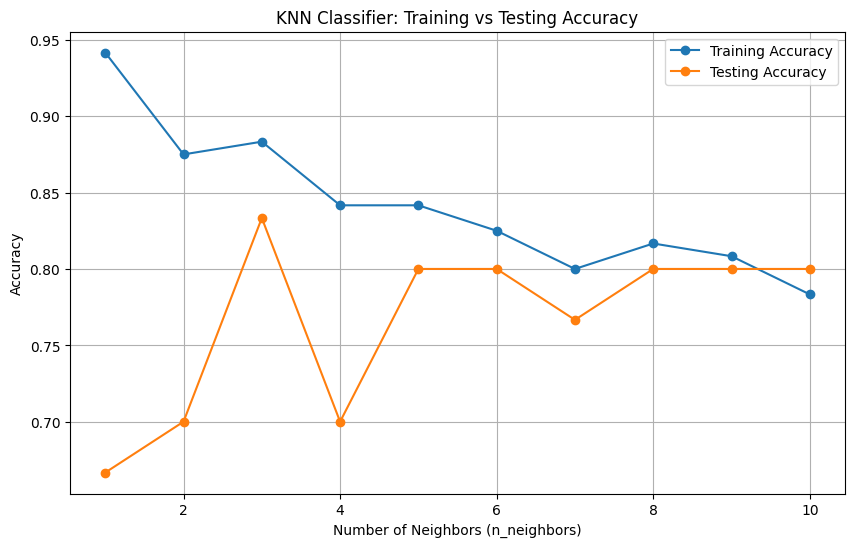

Optimal n_neighbors: 3
Highest Testing Accuracy: 0.83


In [3]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Extract the first two features (sepal length and sepal width)
X = iris.data[:, :2]
y = iris.target

# Create a DataFrame with the iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Print the first few rows of the dataset
print(iris_df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists to record training and testing accuracy
training_accuracy = []
test_accuracy = []

# Try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

# Loop over different values of n_neighbors
for n_neighbors in neighbors_settings:
    # Build the KNN model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # Record testing (generalization) accuracy
    test_accuracy.append(clf.score(X_test, y_test))

# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Testing Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.title("KNN Classifier: Training vs Testing Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal n_neighbors based on the highest testing accuracy
optimal_n_neighbors = neighbors_settings[test_accuracy.index(max(test_accuracy))]
optimal_accuracy = max(test_accuracy)

# Print the optimal number of neighbors and the corresponding accuracy
print(f"Optimal n_neighbors: {optimal_n_neighbors}")
print(f"Highest Testing Accuracy: {optimal_accuracy:.2f}")
